# Introduction to Deeplearning Final Basic Project Code (Demo)

### | GROUP 4  
### | Kaderka Christine / Ko Kyounghyeon  
### | Target paper : *StarGANv2 : Diverse Image Synthesis for Multiple Domains* ([LINK](https://openaccess.thecvf.com/content_CVPR_2020/papers/Choi_StarGAN_v2_Diverse_Image_Synthesis_for_Multiple_Domains_CVPR_2020_paper.pdf))




---



In [ ]:
# drive mount
import os, sys
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---

# Basic setting

This section shows the basic settings.  
- It contains access step to repository and datasets.   
- To fully run the model without any problems, we set the virtual environment with conda.  

All the source of below setting codes are from  [HERE](https://github.com/clovaai/stargan-v2)


## 1. Clone the github repository

In this section, gdrive is mounted and the repository from github is cloned into the specified folder in gdrive.  
This section was left out during the live demo in the presentation to save time.

In [ ]:
# Mount drive
import os, sys
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Clone Repository
%cd /content/drive/Shareddrives/DL\ FInal\ Project/
!git clone https://github.com/clovaai/stargan-v2.git

## 2. Download the datasets and pretrained model into drive

In this section, the working directory is reset and then the CelebA-HQ dataset is downloaded into the specified folder in gdrive. For demonstration purposes, we only show one of the datasets (AFHQ dataset can be seen in 'Group4-full.ipynb'.       
    
This section was not included in the live demo, because:     
- It takes some time to download the complete dataset.
- To save time, we did not use the whole dataset, but instead used 2 images per domain for the training and 5 images per domain for evaluation.

In [ ]:
# Reset working directory
%cd /content/drive/Shareddrives/DL\ FInal\ Project/stargan-v2/

In [ ]:
# Download CelebA-HQ Dataset and model
!bash download.sh celeba-hq-dataset
!bash download.sh pretrained-network-celeba-hq

# wing is a file for data parallel
!bash download.sh wing

## 3. Create a virtual environment

**Virtual environment** : An isolated python environment where a project's dependencies are installed in a different directory or require the old version libraries.

In this section, a virtual environment is generated.  
If the code is run without generating a virtual environment, it could cause an error, because the version of the libraries or other settings could be different.

In [ ]:
# Initialize the path of installed python
%env PYTHONPATH=

env: PYTHONPATH=


In [ ]:
# Install conda on a google colab to use `!conda` command
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

--2021-11-30 05:06:12--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2021-11-30 05:06:12--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh.8’

     0K .......... .......... .......... .......... ..........  0% 9.13M 6s
    50K .......... .......... .......... .......... ..........  

In [ ]:
# Install python (version 3.6.7) with conda 
%%bash
conda install --channel defaults conda python=3.6.7 --yes
conda update --channel defaults --all --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - conda
    - python=3.6.7


The following packages will be UPDATED:

    ca-certificates: 2018.03.07-0         --> 2021.10.26-h06a4308_2   
    certifi:         2018.4.16-py36_0     --> 2021.5.30-py36h06a4308_0
    conda:           4.5.4-py36_0         --> 4.10.3-py36h06a4308_0   
    cryptography:    2.2.2-py36h14c3975_0 --> 3.3.2-py36h3c74f83_0    
    libgcc-ng:       7.2.0-hdf63c60_3     --> 9.1.0-hdf63c60_0        
    libstdcxx-ng:    7.2.0-hdf63c60_3     --> 9.1.0-hdf63c60_0        
    openssl:         1.0.2o-h20670df_0    --> 1.1.1l-h7f8727e_0       
    python:          3.6.5-hc3d631a_2     --> 3.6.7-h0371630_0        
    sqlite:          3.23.1-he433501_0    --> 3.26.0-h7b6447c_0       
    tk:              8.6.7-hc745277_3     --> 8.6.11-h1ccaba5_0       

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executin


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - pytorch/linux-64::torchvision==0.5.0=py36_cu100
  - defaults/linux-64::openjpeg==2.4.0=h3ad879b_0
  - conda-forge/linux-64::ffmpeg==4.0.2=ha0c5888_2
  - conda-forge/linux-64::bzip2==1.0.8=h7f98852_4
  - defaults/linux-64::libtiff==4.2.0=h85742a9_0
  - defaults/linux-64::lcms2==2.12=h3be6417_0
  - defaults/linux-64::pillow==8.3.1=py36h2c7a002_0
  - defaults/linux-64::zstd==1.4.9=haebb681_0


In [ ]:
# Generate virtual environment
!conda create -n stargan-v2 python=3.6.7 -y
!conda activate stargan-v2

Solving environment: - failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: | / - \ done

## Package Plan ##

  environment location: /usr/local/envs/stargan-v2

  added / updated specs:
    - python=3.6.7


The following NEW packages will be INSTALLED:

  _libgcc_mutex      pkgs/main/linux-64::_libgcc_mutex-0.1-main
  _openmp_mutex      pkgs/main/linux-64::_openmp_mutex-4.5-1_gnu
  ca-certificates    pkgs/main/linux-64::ca-certificates-2021.10.26-h06a4308_2
  certifi            pkgs/main/linux-64::certifi-2021.5.30-py36h06a4308_0
  libedit            pkgs/main/linux-64::libedit-3.1.20210910-h7f8727e_0
  libffi             pkgs/main/linux-64::libffi-3.2.1-hf484d3e_1007
  libgcc-ng          pkgs/main/linux-64::libgcc-ng-9.3.0-h5101ec6_17
  libgomp            pkgs/main/linux-64::libgomp-9.3.0-h5101ec6_17
  libstdcxx-ng       pkgs/main/linux-64::libstdcxx-ng-9.3.0-hd4cf53a_17
  ncurses            pkgs/main/linux-64::ncurses-

## 4. Install requirements

In this section, the libraries of the specific python version are installed.

In [ ]:
# Install some libraries of specific version
!conda install -y pytorch=1.4.0 torchvision=0.5.0 cudatoolkit=10.0 -c pytorch
!conda install -y x264=='1!152.20180717' ffmpeg=4.0.2 -c conda-forge
!pip install opencv-python==4.1.2.30 ffmpeg-python==0.2.0 scikit-image==0.16.2
!pip install pillow==7.0.0 scipy==1.2.1 tqdm==4.43.0 munch==2.5.0

Solving environment: - \ | / - \ | / - \ done

# All requested packages already installed.

Solving environment: - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - ffmpeg=4.0.2
    - x264==1!152.20180717


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2021.10.26~ --> conda-forge::ca-certificates-2021.10.8-ha878542_0


Preparing transaction: - done
Verifying transaction: | done
Executing transaction: - done
  Using cached Pillow-8.4.0-cp36-cp36m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0
  Using cached Pillow-7.0.0-cp36-cp36m-manylinux1_x86_64.whl (2.1 MB)
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Unins

---

# Training

This section covers a few explanation needed to understand the training.  
The code below is used for the training.  
With this, we trained the model easily from scratch. 

```
# celeba-hq
python main.py --mode train --num_domains 2 --w_hpf 1 \
               --lambda_reg 1 --lambda_sty 1 --lambda_ds 1 --lambda_cyc 1 \
               --train_img_dir data/celeba_hq/train \
               --val_img_dir data/celeba_hq/val

# afhq
python main.py --mode train --num_domains 3 --w_hpf 0 \
               --lambda_reg 1 --lambda_sty 1 --lambda_ds 2 --lambda_cyc 1 \
               --train_img_dir data/afhq/train \
               --val_img_dir data/afhq/val
```





-------------------------------------------
 **List of parameters we can change**  [source here](https://github.com/clovaai/stargan-v2/blob/master/main.py#L86-L179)  

For example,  
- img_size (resizing the image size, default : 256)
- num_domains (number of domains)
- latent_dim (dimension of latent tensor)
- style_dim (dimension of style code output from mapping network and style encoder)
- ds_iter (iterations of diversity loss)
- total_iters (total iterations)
- batch_size (batch size per iteration)  
- etc.  

We can change the main parameters using below code form:

```
--parameter_name value
# Ex) 
--batch_size 10 --ds_iter 10 \
--hidden_dim 256 
```

Tweaks: We changed some parameters to reduce the running time (so we did not use the default values).    
  


<**What we changed**>
- img_size 256 -> 64
- batch_size 8 -> 1
- val_batch_size 32 -> 1
- eval_every 50000 -> 100001 (Since evaluation during training 
takes too long to execute it, we didn't evaluation during training)

  
  Directory is slightly changed.  
  Other parameters are default.


## 1. Train with CelebA-HQ dataset

This section covers the training with the CelebA-HQ dataset for 3 iterations.

In [ ]:
# working directory setting
%cd /content/drive/Shareddrives/DL\ FInal\ Project/stargan-v2/

/content/drive/Shareddrives/DL FInal Project/stargan-v2


In [ ]:
# celeba-hq
# Demo
!python main.py --mode train --num_domains 2 --w_hpf 1 \
               --lambda_reg 1 --lambda_sty 1 --lambda_ds 1 --lambda_cyc 1 \
               \
               --img_size 64 \
               --batch_size 1 --val_batch_size 1 \
               --num_outs_per_domain 3 \
               --total_iters 3 --ds_iter 3 \
               --print_every 1 --sample_every 1 --save_every 10000 --eval_every 100001 \
               --train_img_dir demo/celeba_hq/train \
               --val_img_dir demo/celeba_hq/val \
               --sample_dir demo/samples/celeba_hq \
               --checkpoint_dir demo/checkpoints/celeba_hq \

Namespace(batch_size=1, beta1=0.0, beta2=0.99, checkpoint_dir='demo/checkpoints/celeba_hq', ds_iter=3, eval_dir='expr/eval', eval_every=100001, f_lr=1e-06, hidden_dim=512, img_size=64, inp_dir='assets/representative/custom/female', lambda_cyc=1.0, lambda_ds=1.0, lambda_reg=1.0, lambda_sty=1.0, latent_dim=16, lm_path='expr/checkpoints/celeba_lm_mean.npz', lr=0.0001, mode='train', num_domains=2, num_outs_per_domain=3, num_workers=4, out_dir='assets/representative/celeba_hq/src/female', print_every=1, randcrop_prob=0.5, ref_dir='assets/representative/celeba_hq/ref', result_dir='expr/results', resume_iter=0, sample_dir='demo/samples/celeba_hq', sample_every=1, save_every=10000, seed=777, src_dir='assets/representative/celeba_hq/src', style_dim=64, total_iters=3, train_img_dir='demo/celeba_hq/train', val_batch_size=1, val_img_dir='demo/celeba_hq/val', w_hpf=1.0, weight_decay=0.0001, wing_path='expr/checkpoints/wing.ckpt')
Number of parameters of generator: 42209283
Number of parameters of m

# Evaluation

This section covers the evaluation for our trained model on the CelebA-HQ dataset. To save time, we changed some parameters (did not use the default values).   
  


<**What we changed**>
- img_size 256 -> 64
- batch_size 8 -> 1
- val_batch_size 32 -> 1
- num_outputs_per_domain 10 -> 3
- eval_every 50000 -> 100001 (Since evaluation during training 
takes too long to execute it, we didn't evaluation during training)

  
  Other parameters are default.


In [ ]:
# working directory setting
%cd /content/drive/Shareddrives/DL\ FInal\ Project/stargan-v2/

/content/drive/Shareddrives/DL FInal Project/stargan-v2


##  Sample images

In this section, we show some sample validation images.

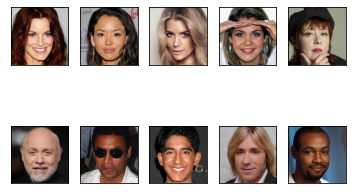

In [ ]:
# Validation Image 
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

fig = plt.figure() 
rows = 2
cols = 5
i = 1

root_dir = "demo/celeba_hq/val/"

# Retrieve the list of ALL folders and files inside the base folder
file_list = glob.glob(root_dir + "*")

sample_data = []
# Create a list that would contain the paths to all the images in the dataset
for class_path in file_list:
    # Retrieve each image in their folders (i.e. 0.jpg, 1.jpg, etc.)
    for img_path in glob.glob(class_path + "/*.jpg"): # for each file with the extension ".jpg"
        
        # cv2.imread(path, method for reading image;flag) 
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)               
        
        # Check for problematic images  
        if type(img) is np.ndarray:
          if img.size == 0:
            continue
        if img is None:
            continue
        sample_data.append(img_path) # append image file path to sample_data list

for filename in sample_data:
    img = cv2.imread(filename)
    img = cv2.resize(img, (256, 256))
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_xticks([]), ax.set_yticks([])

    i += 1
 
plt.show()

### Evaluation demo

This section covers the evaluation of our model.

In [ ]:
# Evaluating...
!python main.py --mode eval --num_domains 2 --w_hpf 1 \
               --lambda_reg 1 --lambda_sty 1 --lambda_ds 1 --lambda_cyc 1 \
               --img_size 64 --batch_size 1 --val_batch_size 1 --num_outs_per_domain 2 \
               --resume_iter 100000 \
               --train_img_dir demo/celeba_hq/train \
               --val_img_dir demo/celeba_hq/val \
               --eval_dir demo/eval/celeba_hq \
               --checkpoint_dir expr/checkpoints/celeba_hq \

Namespace(batch_size=1, beta1=0.0, beta2=0.99, checkpoint_dir='expr/checkpoints/celeba_hq', ds_iter=100000, eval_dir='demo/eval/celeba_hq', eval_every=50000, f_lr=1e-06, hidden_dim=512, img_size=64, inp_dir='assets/representative/custom/female', lambda_cyc=1.0, lambda_ds=1.0, lambda_reg=1.0, lambda_sty=1.0, latent_dim=16, lm_path='expr/checkpoints/celeba_lm_mean.npz', lr=0.0001, mode='eval', num_domains=2, num_outs_per_domain=2, num_workers=4, out_dir='assets/representative/celeba_hq/src/female', print_every=10, randcrop_prob=0.5, ref_dir='assets/representative/celeba_hq/ref', result_dir='expr/results', resume_iter=100000, sample_dir='expr/samples', sample_every=5000, save_every=10000, seed=777, src_dir='assets/representative/celeba_hq/src', style_dim=64, total_iters=100000, train_img_dir='demo/celeba_hq/train', val_batch_size=1, val_img_dir='demo/celeba_hq/val', w_hpf=1.0, weight_decay=0.0001, wing_path='expr/checkpoints/wing.ckpt')
Number of parameters of generator: 42209283
Number o

# Result

In this section, we show the results of our model and compare them with the model the authors run.

In [ ]:
import json # import json module
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
# working directory setting
%cd /content/drive/Shareddrives/DL\ FInal\ Project/stargan-v2/

/content/drive/Shareddrives/DL FInal Project/stargan-v2


The following code cell provides the results of the evaluation metrics LPIPS and FID for both the reference-guided images and latent-guided images for the CelebA-HQ dataset.

In [ ]:
print("CelebA-HQ Dataset Evaluation -------------")

with open('demo/eval/celeba_hq/LPIPS_100000_reference.json') as json_file:
    json_data = json.load(json_file)
    print("LPIPS_reference_mean :", json_data["LPIPS_reference/mean"])

with open('demo/eval/celeba_hq/LPIPS_100000_latent.json') as json_file:
    json_data = json.load(json_file)
    print("LPIPS_latent_mean    :", json_data["LPIPS_latent/mean"])

with open('demo/eval/celeba_hq/FID_100000_reference.json') as json_file:
    json_data = json.load(json_file)
    print("FID_reference_mean   :", json_data["FID_reference/mean"])

with open('demo/eval/celeba_hq/FID_100000_latent.json') as json_file:
    json_data = json.load(json_file)
    print("FID_latent_mean      :", json_data["FID_latent/mean"])

CelebA-HQ Dataset Evaluation -------------
LPIPS_reference_mean : 0.0781792625784874
LPIPS_latent_mean    : 0.029980734130367635
FID_reference_mean   : 195.68706771364344
FID_latent_mean      : 207.5018500230833


**Comparison with the paper's result**

Note : **LPIPS** higher is better / **FID** lower is better

Paper LPIPS_reference_mean --- 0.388 vs. 0.0781 (Ours)   
Paper LPIPS_latent_mean --------- 0.452 vs. 0.0299 (Ours)     
Paper FID_reference_mean ------- 23.8  vs. 195.6870 (Ours)   
Paper FID_latent_mean ------------- 13.7  vs. 207.5018 (Ours) 

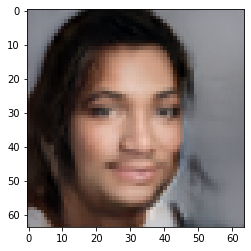

In [ ]:
# Display one of the generated images
img = mpimg.imread('demo/eval/celeba_hq/male2female/0003_01.png')
imgplot = plt.imshow(img)
plt.show()

The generated picture above is distorted!